In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from math import pow

 # Linear Regression

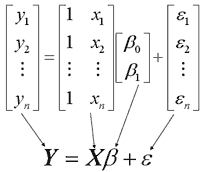

 # Matrix Form

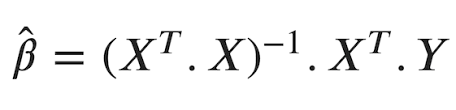

 # Implementation

In [2]:
def linreg(x,y):
    X = np.stack([x,np.ones(len(x))], axis = 1)
    b = np.linalg.inv(X.T@X)@X.T@y
    yhat = b[0]*x + b[1]
    yres = y-yhat
    x2 = x**2
    slope_error = np.sqrt(np.sum(yres**2)/((len(x)-2)*np.sum((x-x.mean())**2)))
    int_error = np.sqrt((np.sum(yres**2)*x2.sum())/((len(x)-2)*len(x)*np.sum((x-x.mean())**2)))
    return b,slope_error,int_error

 # Let's Make a Toy Data Set

In [3]:
x = np.array([3,4,5,6,7,8,9,10,11,12])
y = np.array([0.4455119612,0.5957891332,0.6908027489,0.761079905,0.8454038034,0.9302944145,0.9956232248,
    1.102241831,1.253181224,1.25767214])

Text(0.5, 1.0, 'Toy Data Set')

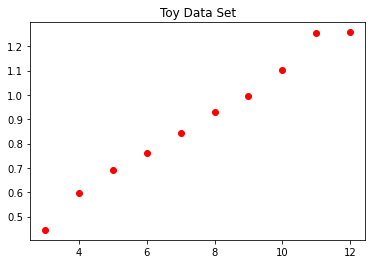

In [4]:
plt.scatter(x,y,label="Data", color ="red")
plt.title("Toy Data Set")

 # Let's use the regression function defined above

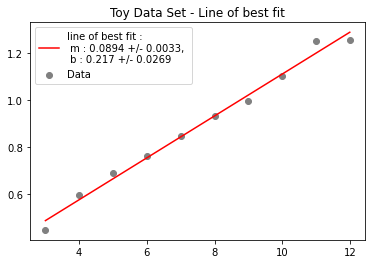

In [5]:
b_vector,slope_error, int_error = linreg(x,y)
plt.plot(x,b_vector[0]*x+b_vector[1], 
label = f"line of best fit : \n m : {b_vector[0].round(4)} +/- {slope_error.round(4)}, \n b : {b_vector[1].round(4)} +/- {int_error.round(4)}", color = "red")

plt.scatter(x,y , color ="gray", label = "Data")
plt.title("Toy Data Set - Line of best fit")
plt.legend()

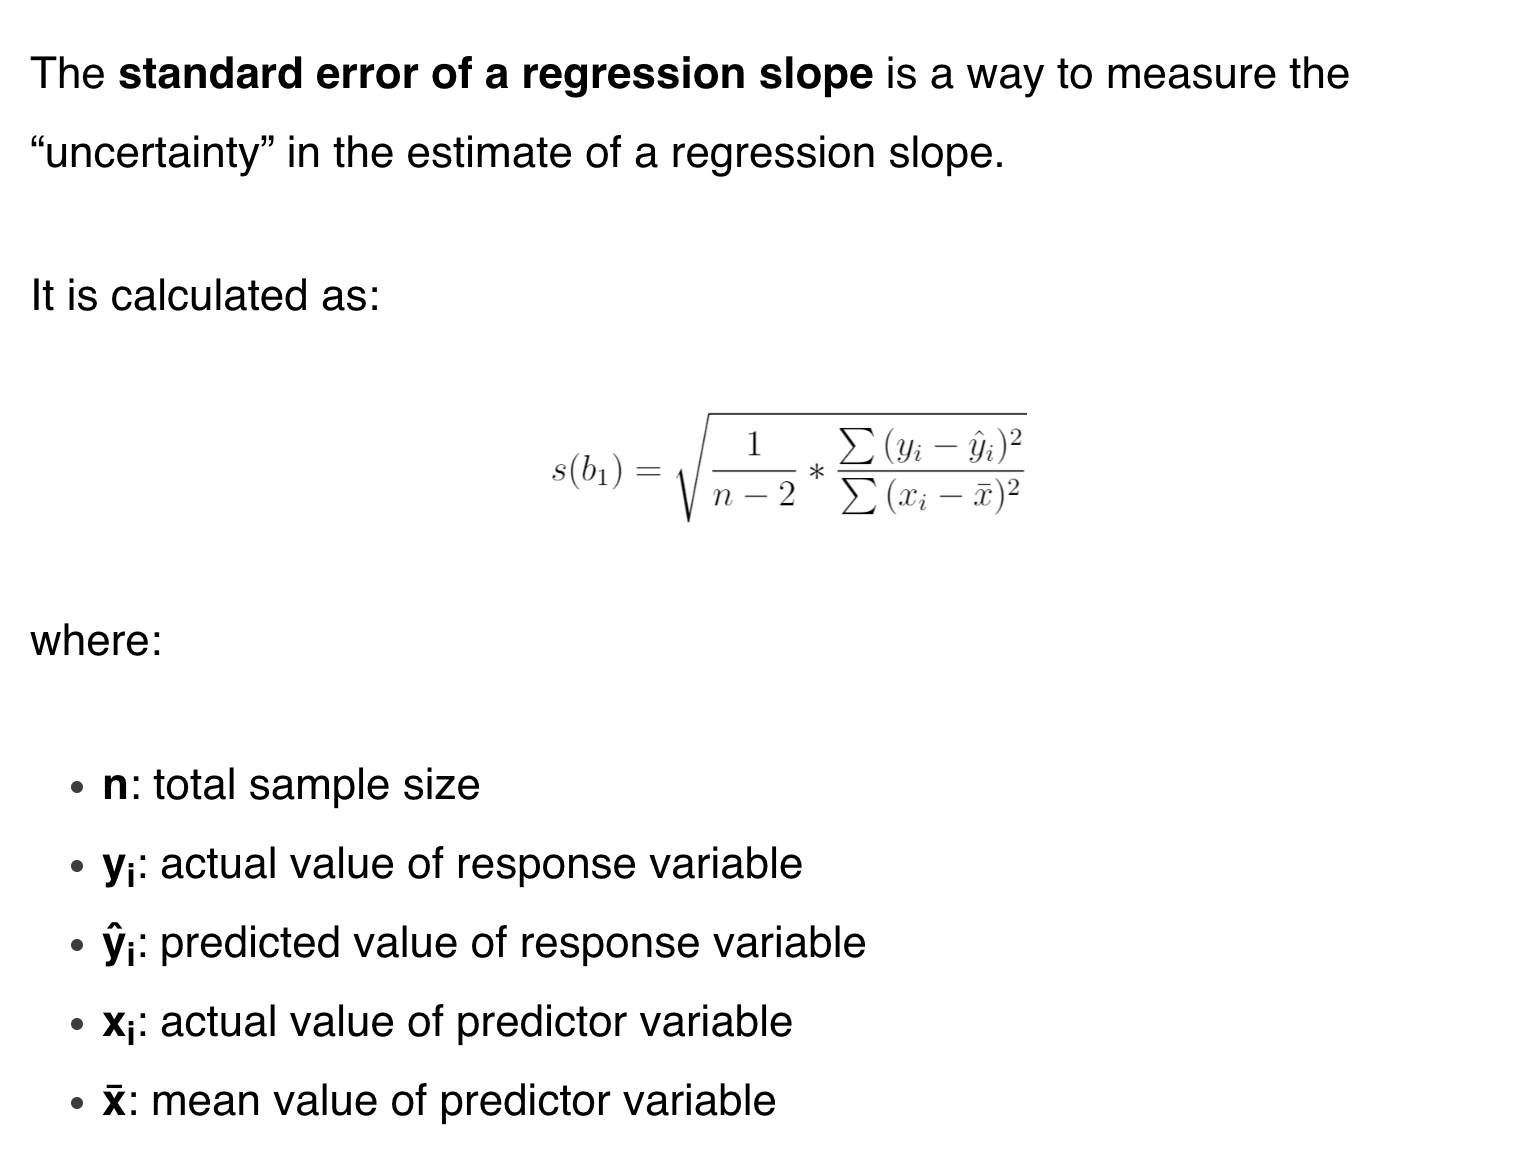

 # I have implemented the error estimates in the linreg function (above) already
  # I print these values below, check them in excel !

In [6]:
print(f"Slope:{b_vector[0]} -/+ {slope_error}, \nIntercept:{b_vector[1]} +/- {int_error}" )


Slope:0.0894357710654545 -/+ 0.0033440749799392715, 
Intercept:0.21699175560909112 +/- 0.026856898869916115


# t-Distribution

 # The t-distribution is a variant of the gaussian distribution that we use when we have only a small number of samples
 
# as the number of samples increases, the t-distribution converges to the normal gaussian distribution
 

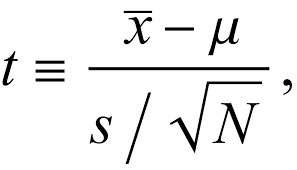

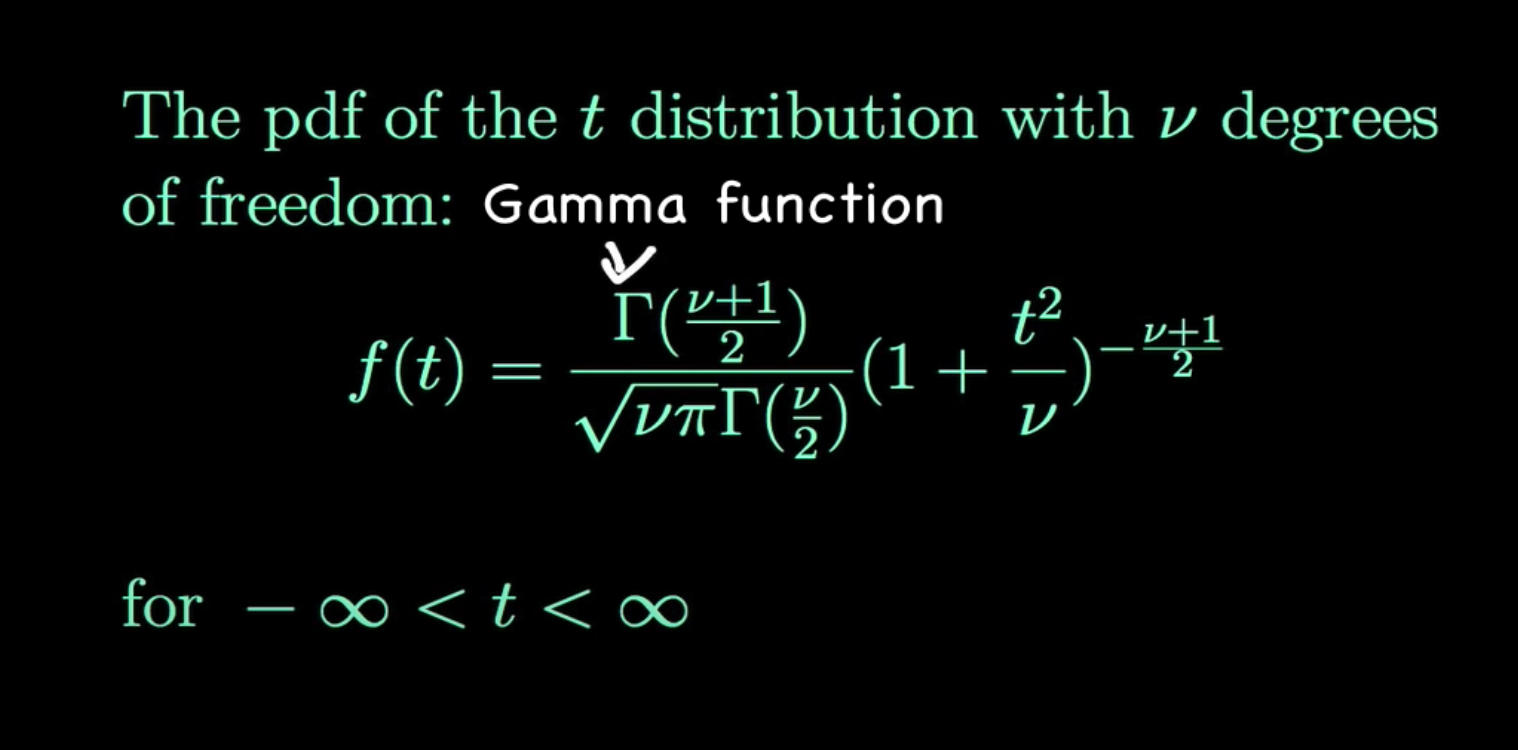

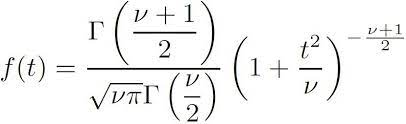

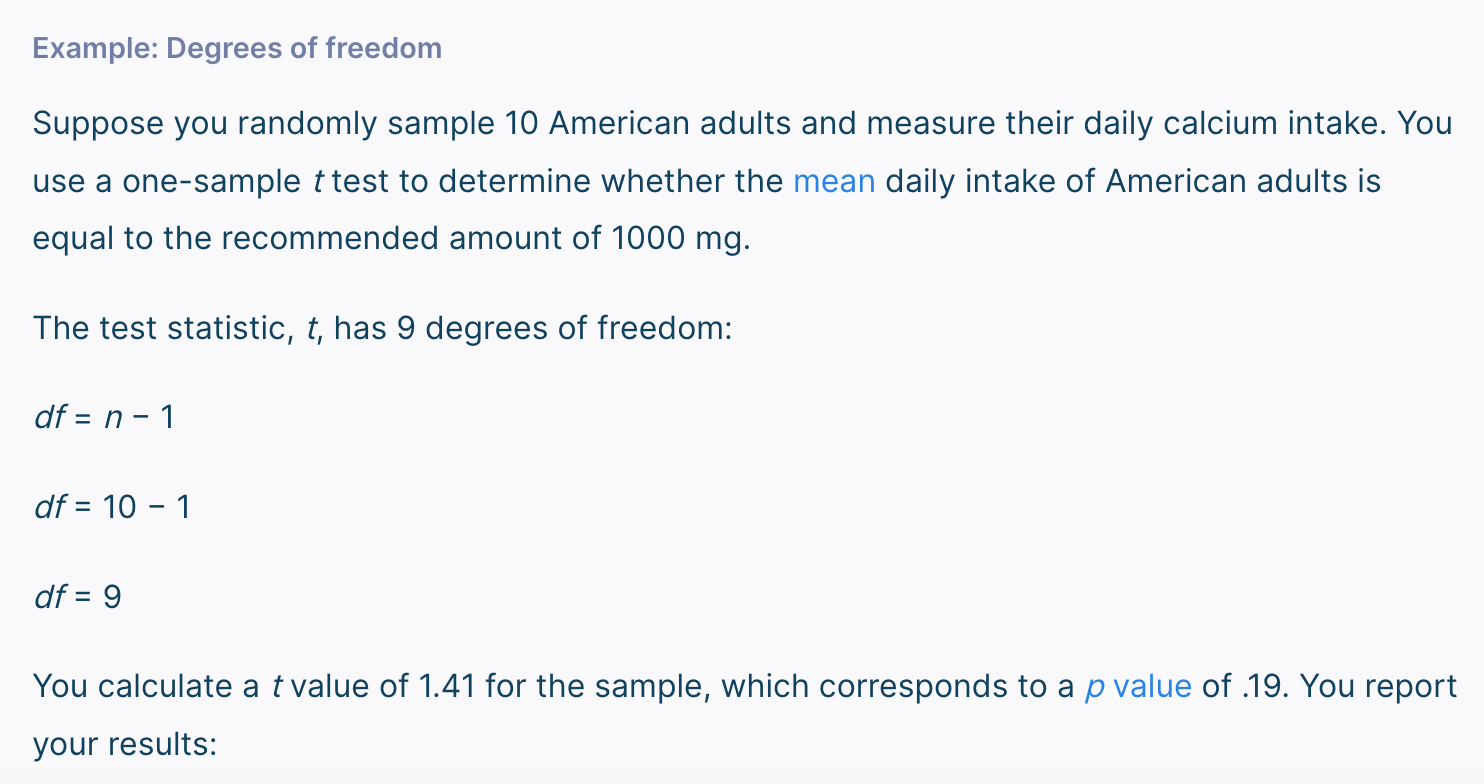

 # Let's write some code to...
 # 1) Compute the above pdf
  # 2 ) Integrate it for different values of "t" to obtain all of the confidence intervals of interest and make our own "t-table"

 # Lets find the t value for the 95th % CI with 8 DOF as an example

In [7]:
#we define the pdf of the t distribution, mathematically defined above, using the function called f,
##the pdf, is defined in code below
def f(t,v):
    return (special.gamma((v+1)/2)/(np.sqrt(v*np.pi)*special.gamma(v/2)))*pow(1+((t**2)/v),(-(v+1)/2))
#t_value = 2.31 we are shooting for (from table)
dof = 8
CI = .95
def get_t_table():
    dof = int(input("Please enter the DOF : "))
    test_ = np.linspace(0,10,10000)
    test = np.array([f(i,dof) for i in test_])
    max_t_value = test_[np.where(test<.0001)[0][0]]
    t_values = np.linspace(0,max_t_value.round(),10000)
    CI_values = np.array([2*integrate.quad(f,0,i,args=dof)[0] for i in t_values])
    return t_values, CI_values
def get_t_value(t_table,CI):
    t_values, CI_values = t_table
    return round(t_values[np.argmin(abs(CI_values-CI))],2) 
t_values, CI_values = get_t_table()
print("Example: for 95% Confidence Interval and 8 degrees of freedom the t value is : ",
      get_t_value(get_t_table(),.95))
      

    

Please enter the DOF : 8
Please enter the DOF : 8
Example: for 95% Confidence Interval and 8 degrees of freedom the t value is :  2.31


 # Here's the T-table we made
  # we print every 1,000th value for brevity 
  # We actually integrated the t-distribution over 10,000 Confidence Intervals

In [8]:
for i in range(0,len(t_values),1000):
    print("Confidence Interval : ",CI_values[i], "t-value : ", t_values[i])

Confidence Interval :  0.0 t-value :  0.0
Confidence Interval :  0.43492801064871 t-value :  0.6000600060006
Confidence Interval :  0.7355769633620741 t-value :  1.2001200120012
Confidence Interval :  0.8904771296874059 t-value :  1.8001800180018004
Confidence Interval :  0.9568394417214763 t-value :  2.4002400240024
Confidence Interval :  0.982936123338002 t-value :  3.0003000300030007
Confidence Interval :  0.9930213515895085 t-value :  3.6003600360036008
Confidence Interval :  0.997005205533658 t-value :  4.2004200420042
Confidence Interval :  0.9986452950791417 t-value :  4.8004800480048
Confidence Interval :  0.9993543991429119 t-value :  5.400540054005401


# as the number of samples increases, the t-distribution converges to the normal gaussian distribution, shown here

Text(0.5, 1.0, 'The t-dist converges to the Gaussian as D.O.F approaches infinity')

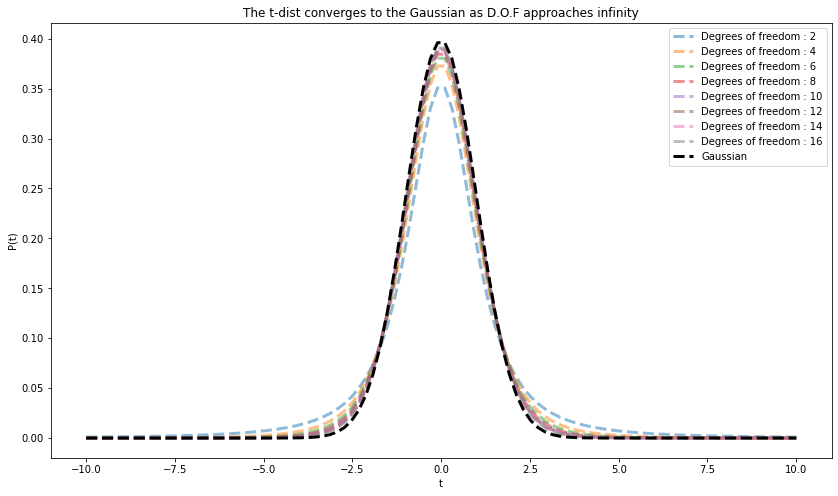

In [9]:
plt.figure(figsize=(14,8))
for j,dof in enumerate(range(2,18,2)):
    #plt.fill_between(np.linspace(-10,10,100),[f(i,dgf) for i in np.linspace(-10,10,100)],
                     #color=f"C{j}", alpha = .5)
    plt.plot(np.linspace(-10,10,100),[f(i,dof) for i in np.linspace(-10,10,100)],
                     color=f"C{j}", alpha = .5, ls="--",lw=3, label = f"Degrees of freedom : {dof}")
    
plt.ylabel("P(t)")
plt.xlabel("t")
plt.plot(np.linspace(-10,10,100),[f(i,120) for i in np.linspace(-10,10,100)],
                     color="black", alpha = 1, ls="--",lw=3, label = f"Gaussian")

plt.legend()  
plt.title("The t-dist converges to the Gaussian as D.O.F approaches infinity")


 # Lets use what we've built to do an example problem from canvas


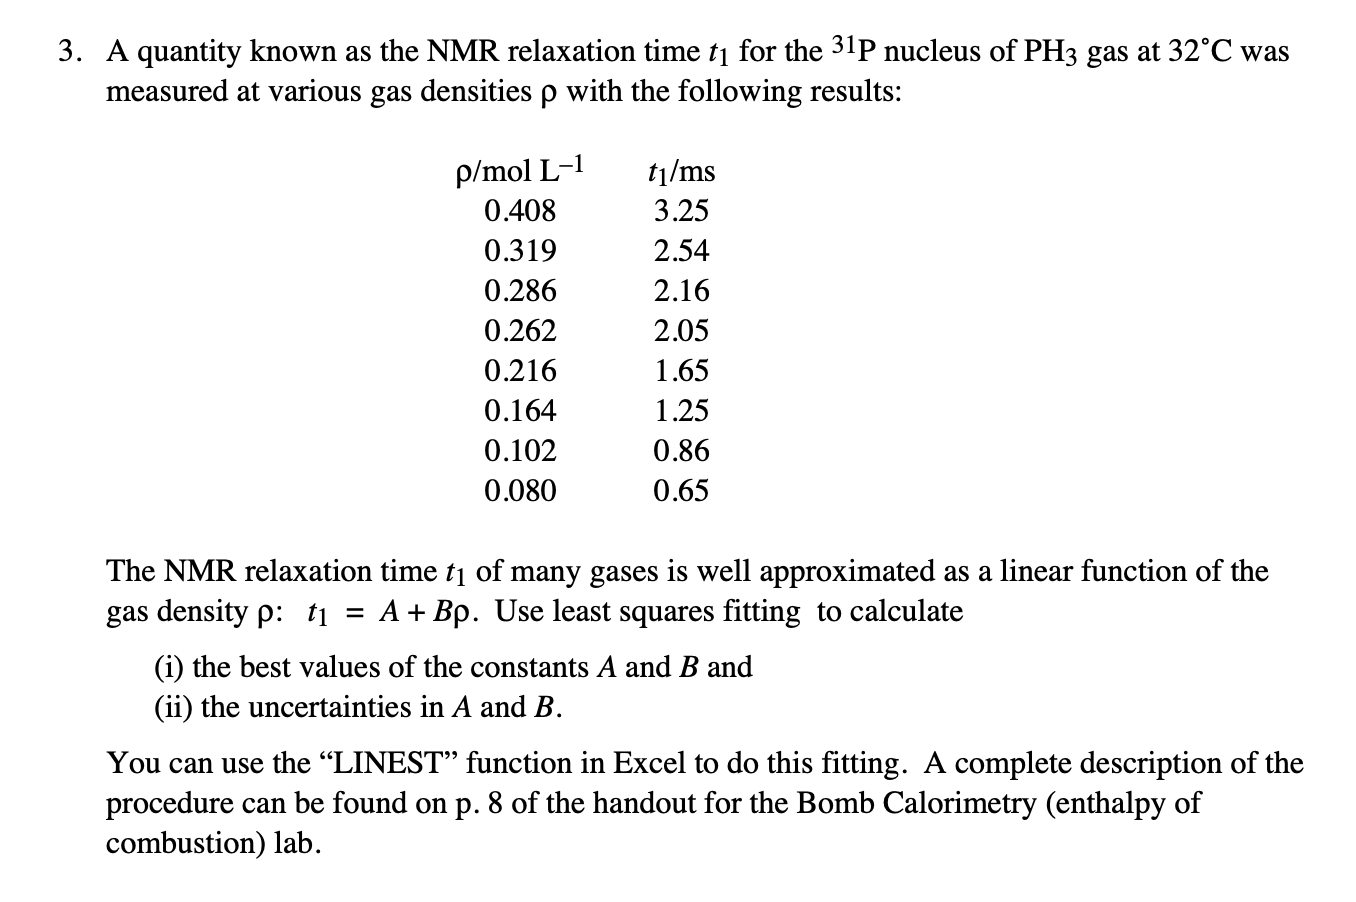

 # Start by entering the dataset into lists

Text(0.5, 1.0, 'Gas Density vs. Relaxation Time')

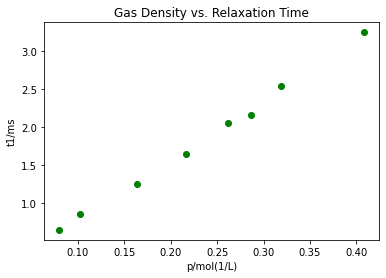

In [10]:
#define the data and plot
t = np.array([3.25,2.54,2.16,2.05,1.65,1.25,.86,.65])
p = np.array([.408,.319,.286,.262,.216,.164,.102,.080])
plt.scatter(p,t, color = "Green");plt.xlabel("p/mol(1/L)");plt.ylabel("t1/ms")
plt.title("Gas Density vs. Relaxation Time")

 # use the linear regression function (linreg) defined above

line of best fit : 
 Slope (B) : 7.836522128 +/- 0.186761329, 
 Intercept (A): 0.0017886063 +/- 0.0471096429


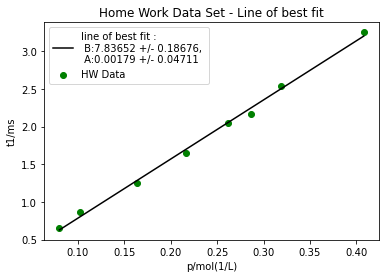

In [11]:
#use the linear regression function (linreg) defined above
slope_intercept_HW, slope_error_HW, int_error_HW = linreg(p,t)
plt.plot(p,slope_intercept_HW[0]*p+slope_intercept_HW[1], 
label = f"line of best fit : \n B:{slope_intercept_HW[0].round(5)} +/- {slope_error_HW.round(5)}, \n A:{slope_intercept_HW[1].round(5)} +/- {int_error_HW.round(5)}", 
         color = "Black")

plt.scatter(p,t , color ="green", label = "HW Data")
plt.xlabel("p/mol(1/L)");plt.ylabel("t1/ms")
plt.title("Home Work Data Set - Line of best fit")
plt.legend()

print(f"line of best fit : \n Slope (B) : {slope_intercept_HW[0].round(10)} +/- {slope_error_HW.round(10)}, \n Intercept (A): {slope_intercept_HW[1].round(10)} +/- {int_error_HW.round(10)}")


 # By Default, the uncertainties provided above are for the 68% confidence interval (one standard deviation)
  # We can scale these to any confidence interval by multiplying by the t-value associated with that confidence interval
   # Importantly, we must use the t-value associated with the degrees of freedom in out dataset

In [12]:
#set the degrees of freedom --- n - 2
deg_of_freedom = len(p)-2
print("for HW problem use DOF = ",deg_of_freedom)
t_values_HW,CI_values_HW = get_t_table()

for HW problem use DOF =  6
Please enter the DOF : 6



# multiply the uncertainty for slope and intercept with the t value associated with a given confidence interval
# I do it for a range of confidence intervals


uncertainty in slope (B in HW) of 95% CI :  0.4569386091223218 
uncertainty in int (A in HW) of 95% CI :  0.1152605564236002


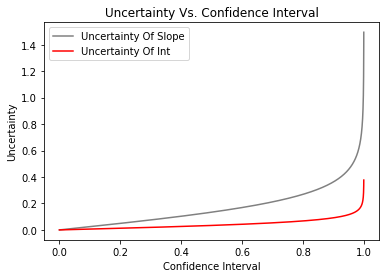

In [13]:

#multiply the uncertainty for slope and intercept with the t value associated with a given confidence interval
#I do it for a range of confidence intervals
uncertainty_slope_HW = t_values_HW*slope_error_HW
uncertainty_int_HW = t_values_HW*int_error_HW
plt.plot(CI_values_HW,uncertainty_slope_HW, color = "gray" ,label =  "Uncertainty Of Slope")
plt.plot(CI_values_HW,uncertainty_int_HW, color = "red",label =  "Uncertainty Of Int" )
plt.xlabel("Confidence Interval")
plt.ylabel("Uncertainty")
plt.title("Uncertainty Vs. Confidence Interval")
plt.legend()
CI_95_hw = np.argmin(abs(CI_values_HW-.95))
uncertainty_slope_HW_95 = uncertainty_slope_HW[CI_95_hw]
uncertainty_int_HW_95 = uncertainty_int_HW[CI_95_hw]
print("\nuncertainty in slope (B in HW) of 95% CI : ", uncertainty_slope_HW_95
     ,"\nuncertainty in int (A in HW) of 95% CI : ",uncertainty_int_HW_95)